In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import stata_setup
#stata_setup.config("C:/Program Files/Stata18", 'be') # Path to the STATA executable
#from pystata import stata

from sklearn.preprocessing import MinMaxScaler

In [2]:
labels = ["Productivity", 
          "Employment", 
          "Population", 
          "Gdp", 
          "Compensation", 
          "TaxesIncomeWealth", 
          "CapitalFormation", 
          "CapitalStock",
          "earlyLeavers"]

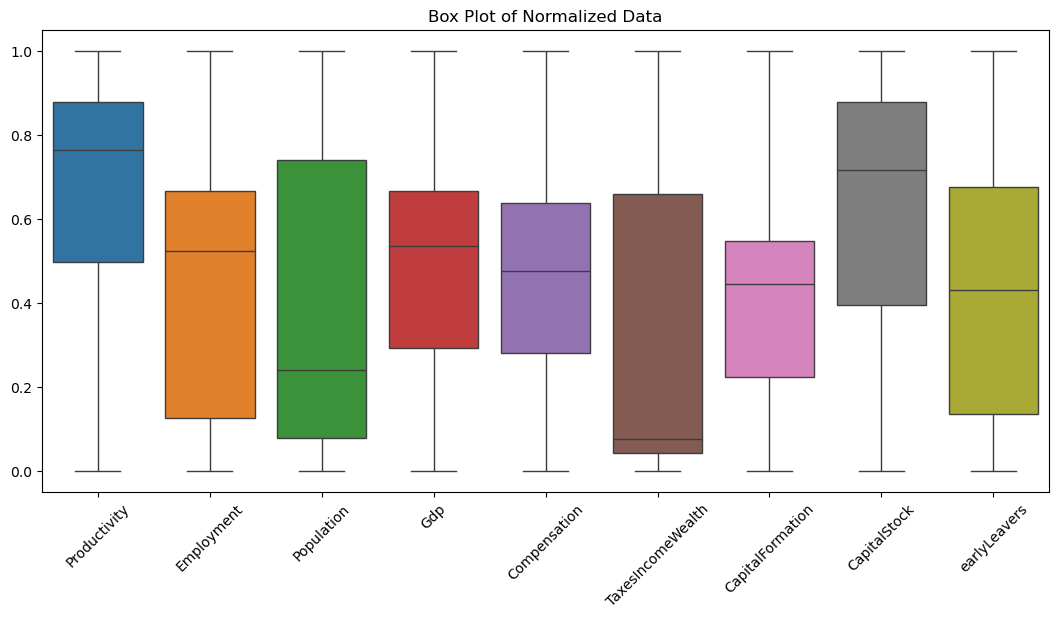

In [3]:
# read data from clean file
df = pd.read_csv('data.csv', index_col=0)
df.columns = labels
# Normalize the data using Min-Max Scaling
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
# Create a box plot for the normalized data
plt.figure(figsize=(13, 6))
sns.boxplot(data=df_normalized)
# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)
plt.title("Box Plot of Normalized Data")
plt.show()

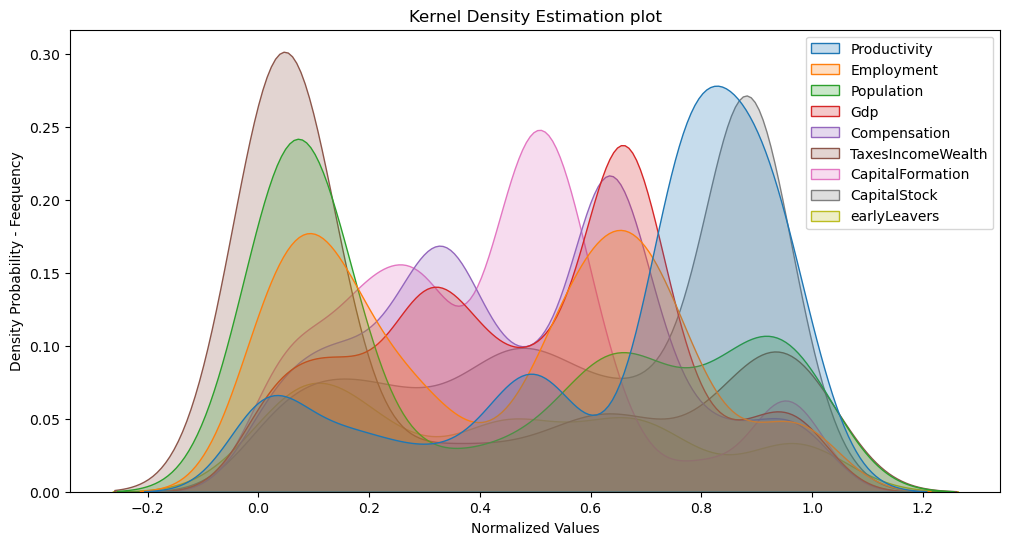

In [7]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df_normalized, fill=True, bw_adjust=0.5)
plt.title("Kernel Density Estimation plot")
plt.ylabel("Density Probability - Feequency")
plt.xlabel('Normalized Values')
plt.show()

# Dependent Variable

### Real Labor Productivity per Person Employed (SOVGDE) - Ratio GDP and Number of Persons emloyed
SOVGDE variable indicates real labor productivity per person employed. A higher value indicates that the economy is able to produce more output (GDP) for each person employed, which is typically a sign of technological advancement, increased skills in the workforce, or greater capital investment.

The formula for real labor productivity per person employed is:
$$
{Real Labor Productivity per Person Employed} = \frac{\text{Real GDP}}{\text{Number of Persons Employed}}
$$

Where:
- **Real GDP**: The total value of goods and services produced within an economy, adjusted for inflation.
- **Number of Persons Employed**: The total number of people employed in the economy.

This formula measures the output per person employed, providing a gauge of labor efficiency within an economy.

In [11]:
with open('stata_dict.txt', 'r') as file:
        stata_vals_dict = eval(file.read())  # Use eval carefully for trusted input
        print(stata_vals_dict)

{'SOVGDE': ['Real labour productivity per person employed', 'realLabourProductivityPerPersonE'], 'SNETD': ['Total Employment (workplace based, employed persons)', 'totalEmploymentWorkplaceBasedEmp'], 'SNPTD': ['Average annual population', 'averageAnnualPopulation'], 'SUVGD': ['GDP at current market prices', 'gdpAtCurrentMarketPrices'], 'RUWCD': ['Compensation of employees at current prices', 'compensationOfEmployeesAtCurrent'], 'RUYNH': ['Current taxes on income and wealth', 'currentTaxesOnIncomeAndWealth'], 'RUIGT': ['Gross Fixed Capital Formation at current prices', 'grossFixedCapitalFormationAtCurr'], 'ROKND': ['Capital Stock at constant prices', 'capitalStockAtConstantPrices'], 'RPDNN': ['Early leavers from education and training', 'earlyLeaversFromEducationAndTrai']}


In [13]:
stata_vals_dict

{'SOVGDE': ['Real labour productivity per person employed',
  'realLabourProductivityPerPersonE'],
 'SNETD': ['Total Employment (workplace based, employed persons)',
  'totalEmploymentWorkplaceBasedEmp'],
 'SNPTD': ['Average annual population', 'averageAnnualPopulation'],
 'SUVGD': ['GDP at current market prices', 'gdpAtCurrentMarketPrices'],
 'RUWCD': ['Compensation of employees at current prices',
  'compensationOfEmployeesAtCurrent'],
 'RUYNH': ['Current taxes on income and wealth',
  'currentTaxesOnIncomeAndWealth'],
 'RUIGT': ['Gross Fixed Capital Formation at current prices',
  'grossFixedCapitalFormationAtCurr'],
 'ROKND': ['Capital Stock at constant prices', 'capitalStockAtConstantPrices'],
 'RPDNN': ['Early leavers from education and training',
  'earlyLeaversFromEducationAndTrai']}

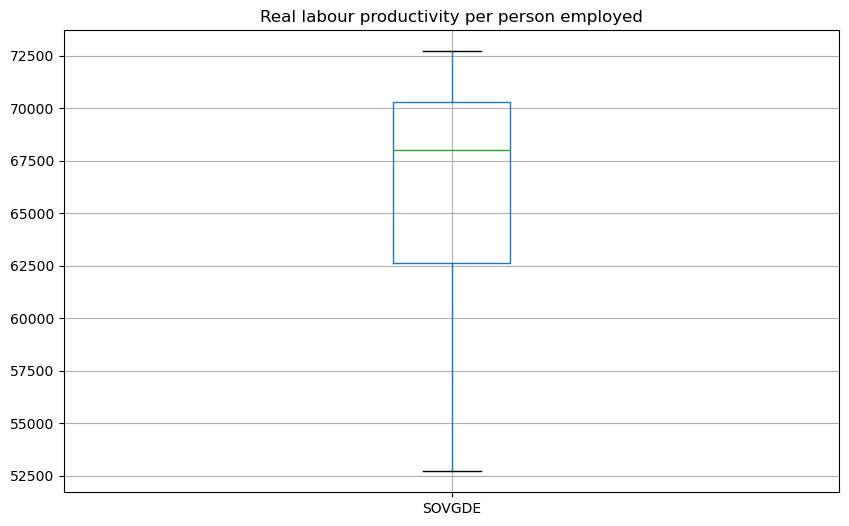

In [14]:
# Create a boxplot for the 'SOVGDE' column with customizations
df.boxplot(column='SOVGDE', figsize=(10, 6), grid=True)

plt.title('Real labour productivity per person employed')

# Display the plot
plt.show()

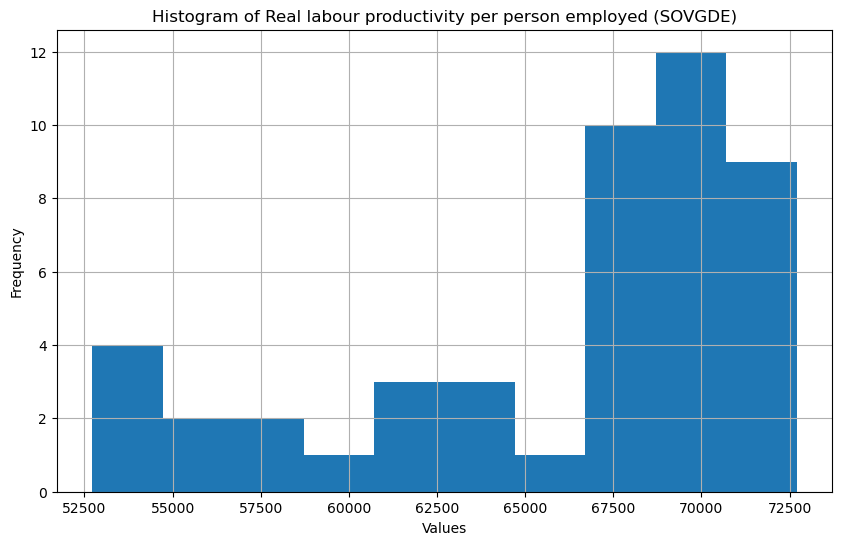

In [15]:
# Plot a histogram of 'SOVGDE'
df['SOVGDE'].hist(bins=10, figsize=(10, 6))

# Add title and labels
plt.title('Histogram of Real labour productivity per person employed (SOVGDE)')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Display the plot
plt.show()

A Kernel Density Estimation (KDE) plot is a smooth estimate of the probability density function (PDF) of a continuous random variable. It provides a smooth curve based on the data distribution, often used as an alternative to histograms for visualizing data distribution.

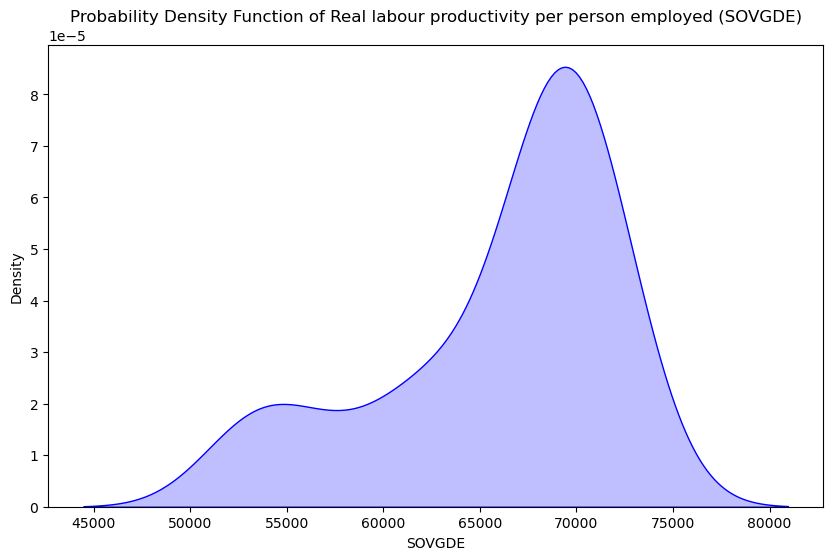

In [16]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plotting the Probability Density Function (PDF) of the 'SOVGDE' column with filling
sns.kdeplot(df['SOVGDE'], fill=True, color="blue")

# Adding titles and labels for clarity
plt.title('Probability Density Function of Real labour productivity per person employed (SOVGDE)')
plt.xlabel('SOVGDE')
plt.ylabel('Density')

# Show the plot
plt.show()

The curve has two peaks (bimodal), this indicates that the Real Labour Productivity per person employed might come from two different groups with distinct distributions.

# Inependent Variables

In [17]:
df.head()

,SOVGDE,SNETD,SNPTD,SUVGD,RUWCD,RUYNH,RUIGT,ROKND,RPDNN
1980,52720.23,21493.0,56472720.0,341455.1,156060.1,61278.7,88494.3,3230559.0,NaN
1981,53048.03,21479.1,56540513.0,385319.7,178664.1,71302.5,100625.5,3342040.0,NaN
1982,53015.90,21525.6,56543548.0,434131.5,198557.0,88362.0,107278.3,3438693.0,NaN
1983,53330.18,21596.7,56564074.0,496161.4,223689.0,104323.6,116710.2,3527297.0,NaN
1984,54969.19,21584.0,56576718.0,554662.7,243842.6,119351.5,128981.8,3617799.0,NaN


### Total Employment SNETD

This methodology helps in distinguishing between the employment status of residents in a region versus the availability of jobs in that region, with different uses for various types of analysis (e.g., GDP, productivity, employment rates)

Total Employment refers to all persons engaged in productive activities within the production boundary of national accounts. This includes both employees (working for another entity in exchange for remuneration) and self-employed individuals (owners of unincorporated enterprises).

European Union's (EU) framework for national accounting distinguishes two employment concepts, depending on the geographical scope:

- resident persons in employment (i.e. the so-called national concept of employment, hereafter also referred to as residence-based)
- employment in resident production units irrespective of the place of residence of the employed person (i.e. domestic concept, hereafter also referred to as workplace-based).

The difference between these two concepts is mainly due to cross-border workers. Regional accounts report both, but the domestic (workplace-based) concept is more emphasized, especially when analyzing employment alongside GDP. The Labour Force Survey (LFS), which covers resident households, requires adjustments for cross-border workers to match the domestic concept.

While household-based figures are useful for assessing employment and unemployment rates, regional accounts are more suited for evaluating productivity.

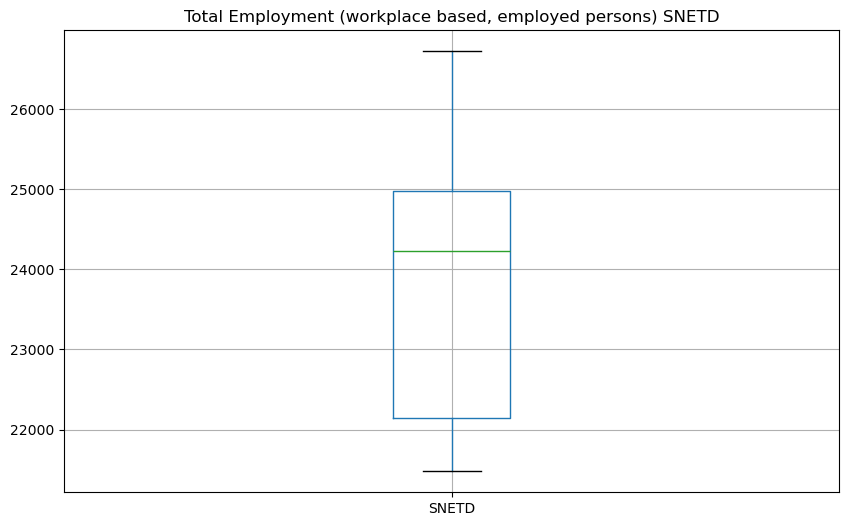

In [18]:
# Create a boxplot for the 'SNETD' column with customizations
df.boxplot(column='SNETD', figsize=(10, 6), grid=True)

plt.title('Total Employment (workplace based, employed persons) SNETD')

# Display the plot
plt.show()

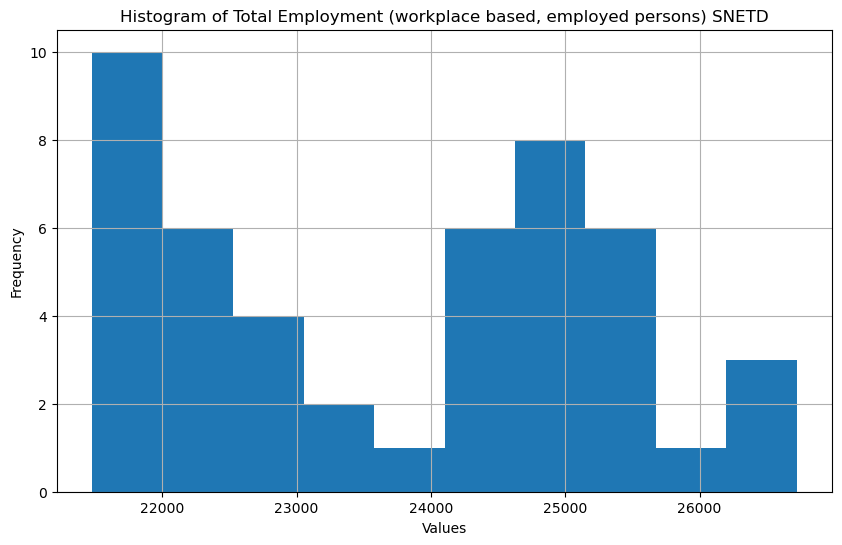

In [19]:
# Plot a histogram of 'SNETD'
df['SNETD'].hist(bins=10, figsize=(10, 6))

# Add title and labels
plt.title('Histogram of Total Employment (workplace based, employed persons) SNETD')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Display the plot
plt.show()

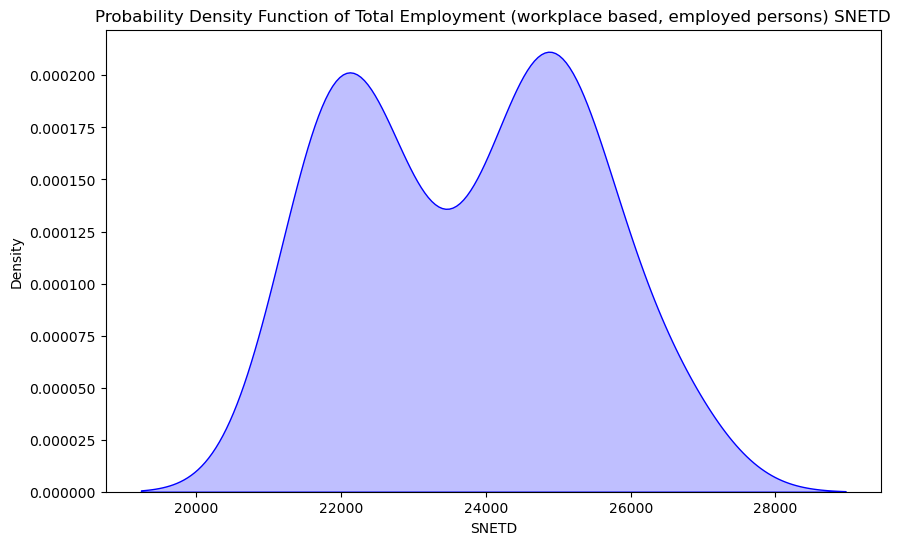

In [20]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plotting the Probability Density Function (PDF) of the 'SNETD' column with filling
sns.kdeplot(df['SNETD'], fill=True, color="blue")

# Adding titles and labels for clarity
plt.title('Probability Density Function of Total Employment (workplace based, employed persons) SNETD')
plt.xlabel('SNETD')
plt.ylabel('Density')

# Show the plot
plt.show()

The curve has two peaks (bimodal), this indicates that the Total Employment (workplace based, employed persons) might come from two different groups with distinct distributions.

### Total Population (annual average) SNPTD
This dataset provides the annual average population based on Regional Accounts. It is used to compute indicators "per capita".

Methodology:
The methods for the compilation of the annual average population differ between countries because of the varying availability of population data sources. The compilation of the annual average population may be based on any of the following methods:

12 monthly averages;
4 quarterly averages;
The average of the population on 1st January of two consecutive years;
A mid-year estimates.
As the time-series for "total population on 1st January" (SNPTN) is rather accurate, the method applied in ARDECO to compute the annual average population is based on the average of the population on 1st January of two consecutive years, by applying the following formula:

$$
SNPTD(t) = \frac{SNPTN(t)}{SNPTN(t+1)}
$$

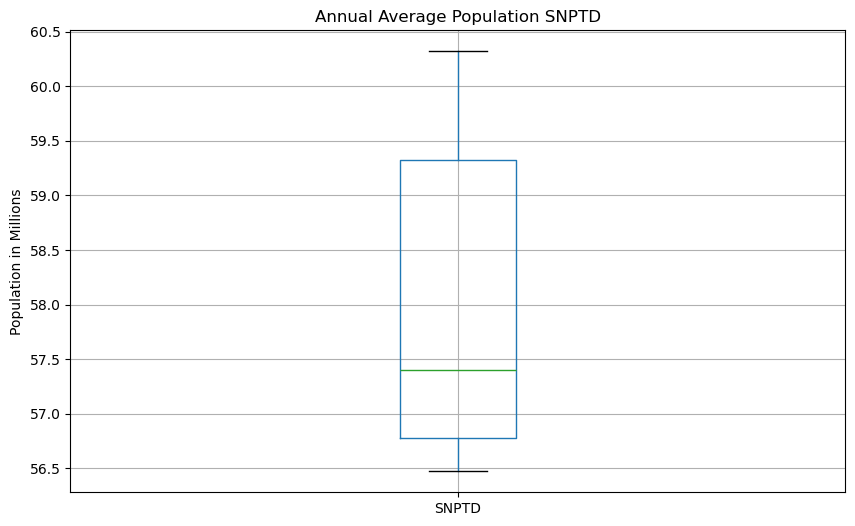

In [21]:
# Create a boxplot for the ''SNPTD'' column with customizations
df['SNPTD_in_millions'] = df['SNPTD'] / 1_000_000
ax = df.boxplot(column='SNPTD_in_millions', figsize=(10, 6), grid=True)


plt.title('Annual Average Population SNPTD')
plt.ylabel('Population in Millions')
ax.set_xticklabels(['SNPTD'])

# Display the plot
plt.show()

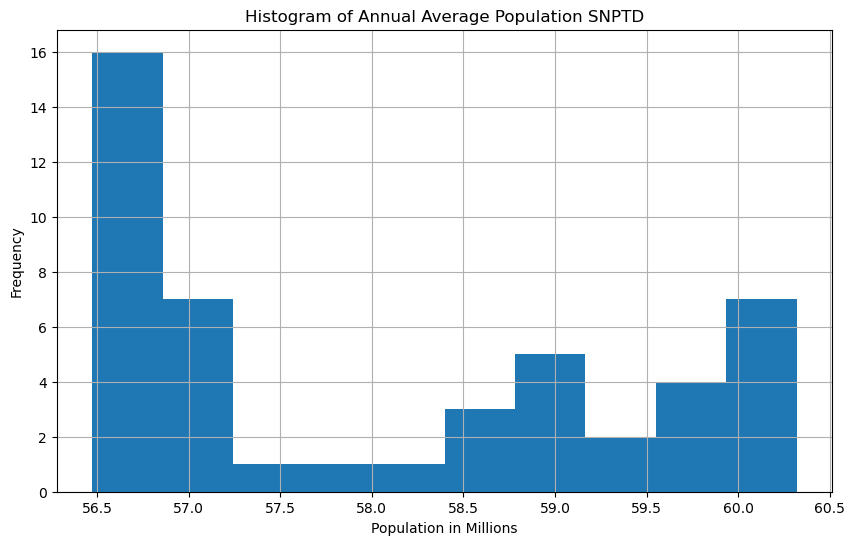

In [22]:
# Plot a histogram of 'SNPTD'
(df['SNPTD']/1_000_000).hist(bins=10, figsize=(10, 6))

# Add title and labels
plt.title('Histogram of Annual Average Population SNPTD')
plt.xlabel('Population in Millions')
plt.ylabel('Frequency')

# Display the plot
plt.show()

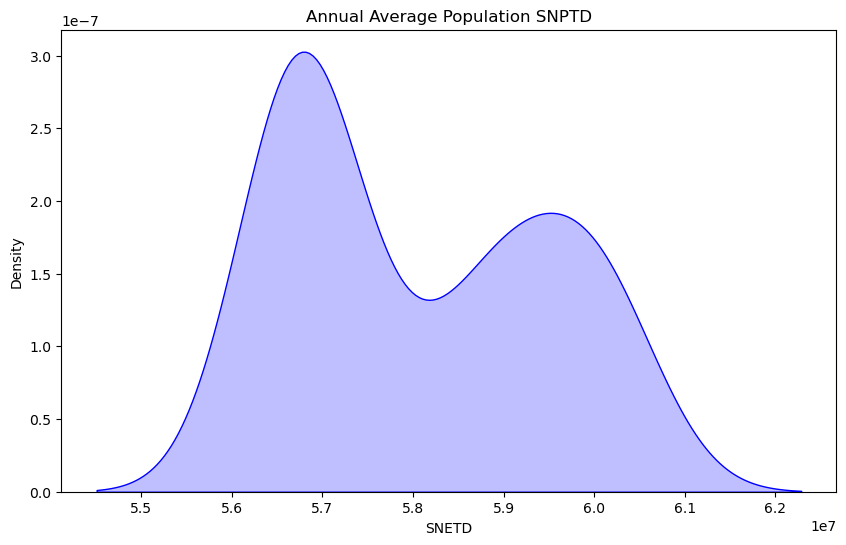

In [23]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plotting the Probability Density Function (PDF) of the 'SNETD' column with filling
sns.kdeplot(df['SNPTD'], fill=True, color="blue")

# Adding titles and labels for clarity
plt.title('Annual Average Population SNPTD')
plt.xlabel('SNETD')
plt.ylabel('Density')

# Show the plot
plt.show()

The curve has two peaks (bimodal), this indicates that the Anual Average Population might come from two different groups with distinct distributions.

### 'GDP at current market prices SUVGD'
GDP is a measure of total domestic production, i.e. the monetary value of all the goods and services produced within a region or country during a specific period (usually a year). Regional GDP can also be defined as regional GVA plus taxes on products less subsidies on products. This variable is not going to be used because it is part of the dependent variable.

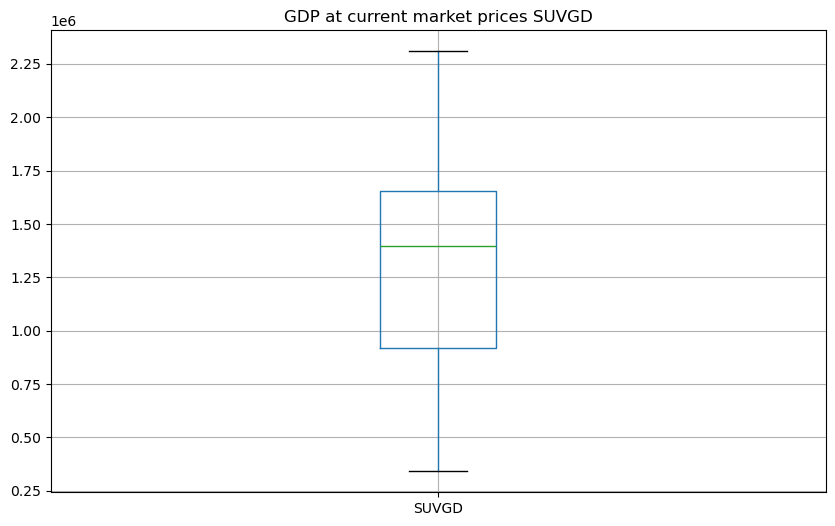

In [24]:
# Create a boxplot for the 'SUVGD' column with customizations
df.boxplot(column='SUVGD', figsize=(10, 6), grid=True)

plt.title('GDP at current market prices SUVGD')

# Display the plot
plt.show()

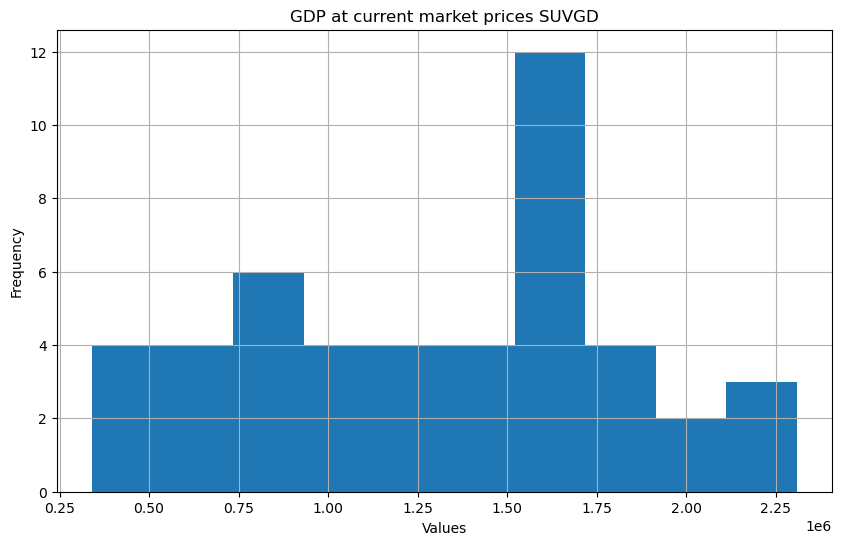

In [25]:
# Plot a histogram of 'SNETD'
df['SUVGD'].hist(bins=10, figsize=(10, 6))

# Add title and labels
plt.title('GDP at current market prices SUVGD')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Display the plot
plt.show()

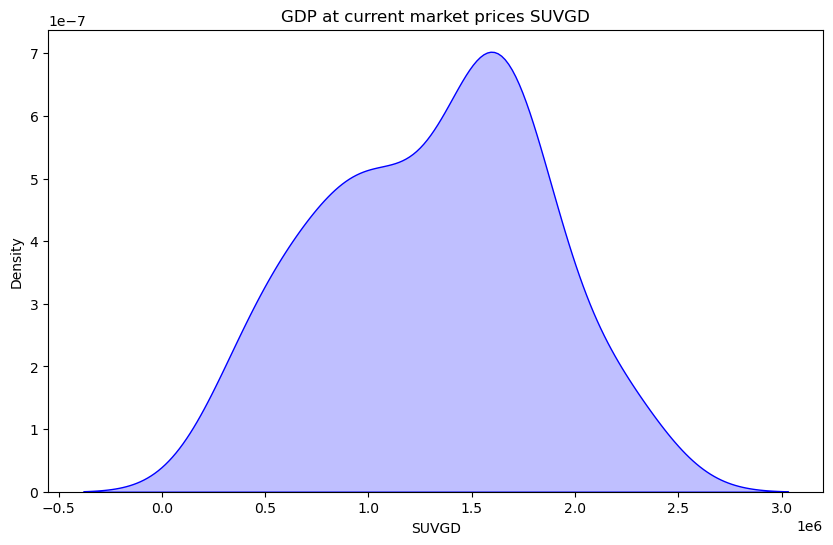

In [26]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plotting the Probability Density Function (PDF) of the 'SNETD' column with filling
sns.kdeplot(df['SUVGD'], fill=True, color="blue")

# Adding titles and labels for clarity
plt.title('GDP at current market prices SUVGD')
plt.xlabel('SUVGD')
plt.ylabel('Density')

# Show the plot
plt.show()

Not sure if this curve has two peaks (bimodal), probably in this case it is a little bit hidden. We could explore the possibility to explain this variable using the others.

### Compensation of Employees at current prices RUWCD
Compensation of employees is defined as the total remuneration, in cash or in kind, payable by an employer to an employee in return for work done by the latter during an accounting period.

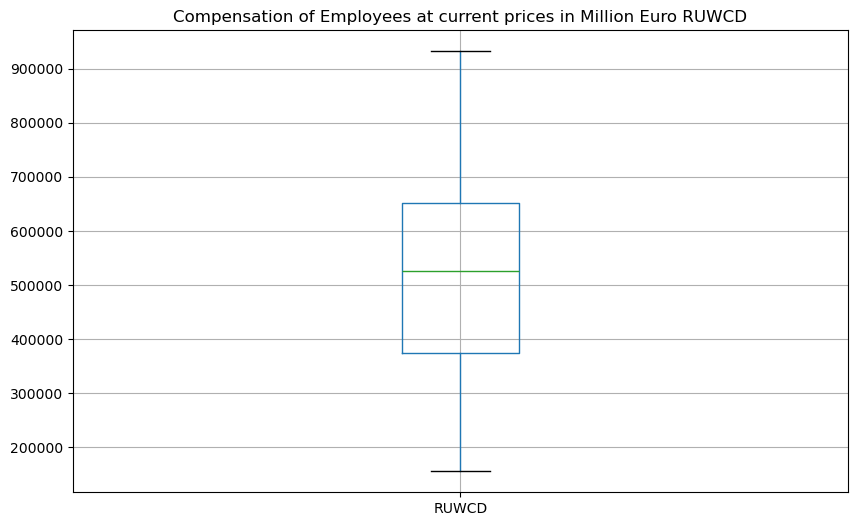

In [27]:
# Create a boxplot for the 'SOVGDE' column with customizations
df.boxplot(column='RUWCD', figsize=(10, 6), grid=True)

plt.title('Compensation of Employees at current prices in Million Euro RUWCD')

# Display the plot
plt.show()

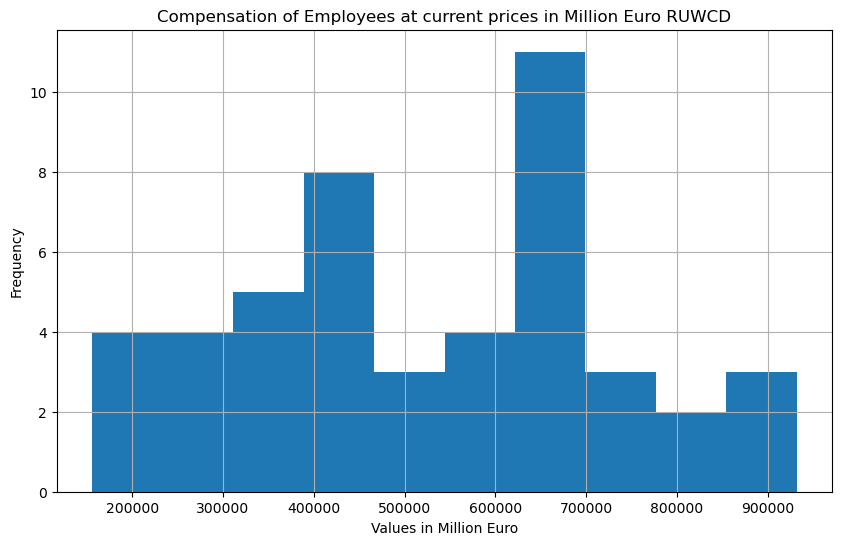

In [28]:
# Plot a histogram of 'RUWCD'
df['RUWCD'].hist(bins=10, figsize=(10, 6))

# Add title and labels
plt.title('Compensation of Employees at current prices in Million Euro RUWCD')
plt.xlabel('Values in Million Euro')
plt.ylabel('Frequency')

# Display the plot
plt.show()

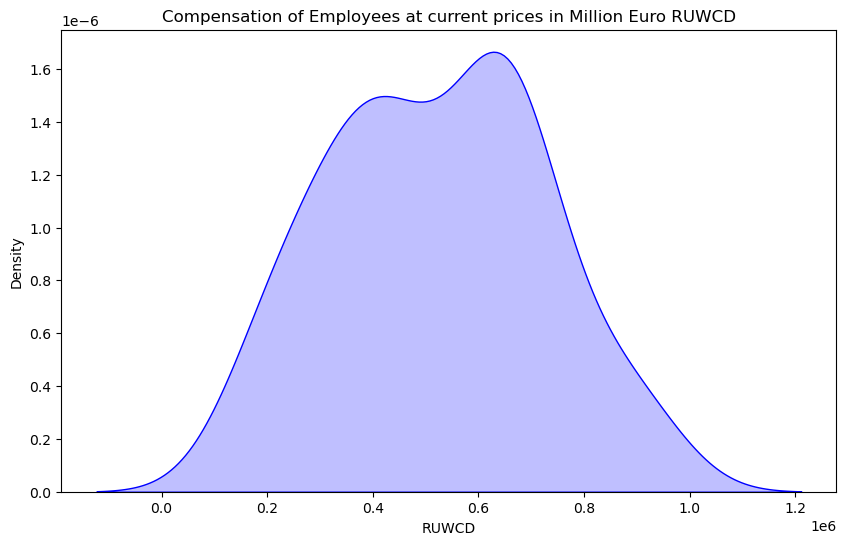

In [29]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plotting the Probability Density Function (PDF) of the 'RUWCD' column with filling
sns.kdeplot(df['RUWCD'], fill=True, color="blue")

# Adding titles and labels for clarity
plt.title('Compensation of Employees at current prices in Million Euro RUWCD')
plt.xlabel('RUWCD')
plt.ylabel('Density')

# Show the plot
plt.show()

Not sure if this curve has two peaks (bimodal), probably in this case it is a little bit hidden. 

### Net property income RUYNH

Net property income in the context of households refers to the difference between the **total revenue generated from property** (such as rental income) and the associated operating expenses, which include maintenance costs, property taxes, and other property-related expenses. This income also encompasses, among other things, interest earned by households on their financial investments (after subtracting interest paid on loans), dividends, withdrawals from the income of "quasi-corporations," investment income from insurance or pension entitlements, and rental income from land. Net property income is part of primary income, alongside other components such as compensation of employees, net operating surplus, and mixed income.

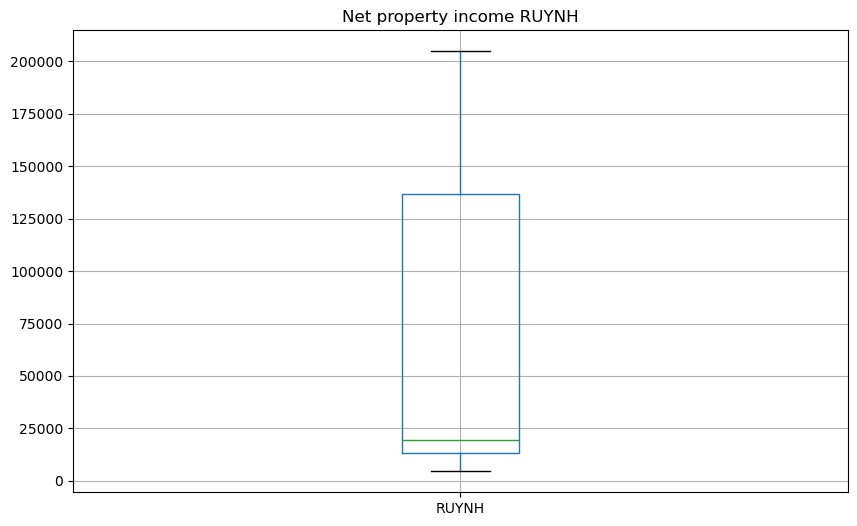

In [30]:
# Create a boxplot for the 'RUYNH' column with customizations
df.boxplot(column='RUYNH', figsize=(10, 6), grid=True)

plt.title('Net property income RUYNH')

# Display the plot
plt.show()

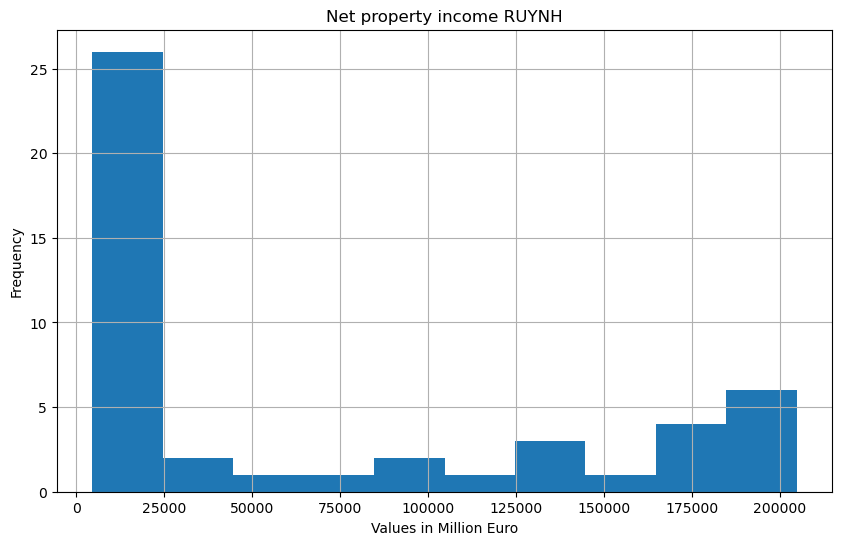

In [31]:
# Plot a histogram of 'RUYNH'
df['RUYNH'].hist(bins=10, figsize=(10, 6))

# Add title and labels
plt.title('Net property income RUYNH')
plt.xlabel('Values in Million Euro')
plt.ylabel('Frequency')

# Display the plot
plt.show()

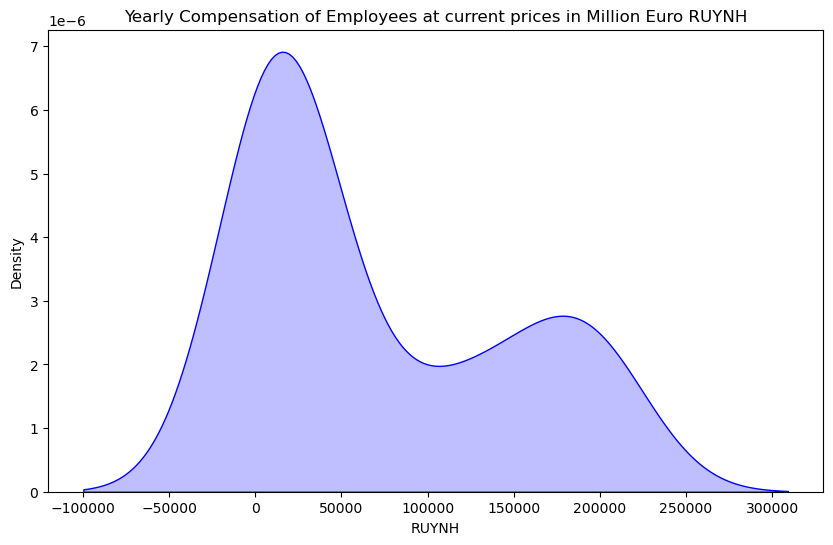

In [32]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plotting the Probability Density Function (PDF) of the 'RUYNH' column with filling
sns.kdeplot(df['RUYNH'], fill=True, color="blue")

# Adding titles and labels for clarity
plt.title('Yearly Compensation of Employees at current prices in Million Euro RUYNH')
plt.xlabel('RUYNH')
plt.ylabel('Density')

# Show the plot
plt.show()

The curve has two peaks (bimodal). Two distributions, two worlds in the same contry. People losing money for housing and people making money for housing. Very interesting!!!

### Gross Fixed Capital Formation at current prices RUIGT

Gross Fixed Capital Formation (GFCF) at current prices represents the total value of new and replacement fixed assets acquired by businesses, government, and other institutions during a specific period, typically a year. It includes investments in physical assets like buildings, machinery, equipment, and infrastructure, excluding financial assets or inventories.

When measured at current prices, it refers to the value of these investments in the prices that are prevailing at the time of the transaction (i.e., without adjusting for inflation). This means that the values reflect the current market prices at the time of the acquisition, rather than adjusting for price changes over time.

Units:
Million EUR (Euros): The value of Gross Fixed Capital Formation is expressed in millions of Euros, which is a common currency for economic and financial reporting in the Eurozone.

Million PPS (Purchasing Power Standard): PPS is an artificial currency unit used for comparing the relative purchasing power of different countries or regions. It eliminates differences in price levels across countries, allowing for more accurate comparisons of real investment values between regions. For example, when Gross Fixed Capital Formation is reported in Million Purchasing Power Standard, it accounts for differences in cost of living and inflation between countries.

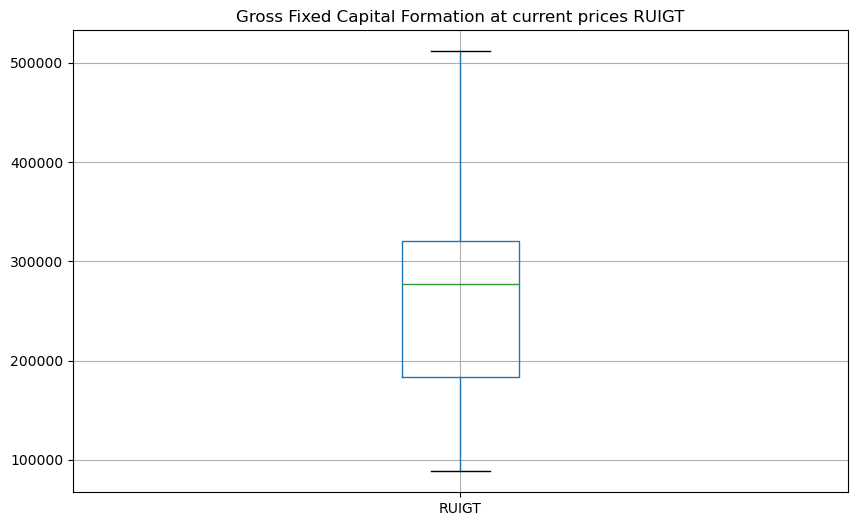

In [33]:
# Create a boxplot for the 'RUIGT' column with customizations
df.boxplot(column='RUIGT', figsize=(10, 6), grid=True)

plt.title('Gross Fixed Capital Formation at current prices RUIGT')

# Display the plot
plt.show()

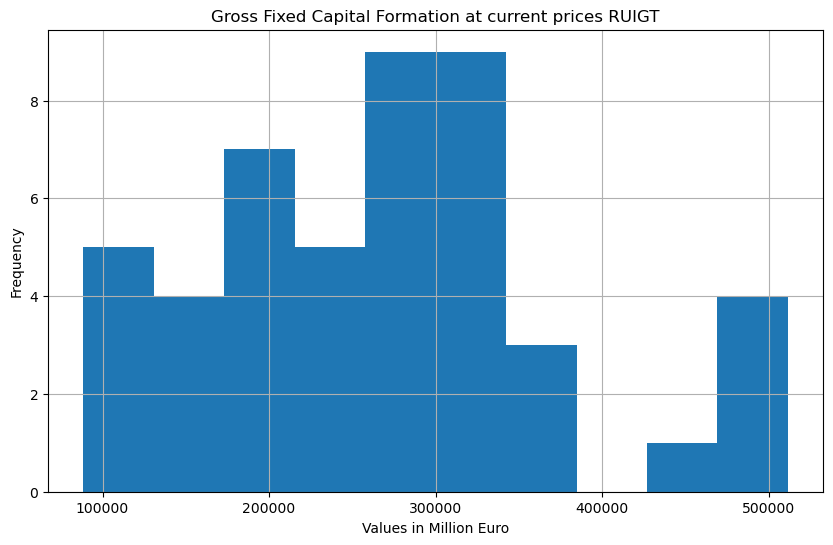

In [34]:
# Plot a histogram of 'RUYNH'
df['RUIGT'].hist(bins=10, figsize=(10, 6))

# Add title and labels
plt.title('Gross Fixed Capital Formation at current prices RUIGT')
plt.xlabel('Values in Million Euro')
plt.ylabel('Frequency')

# Display the plot
plt.show()

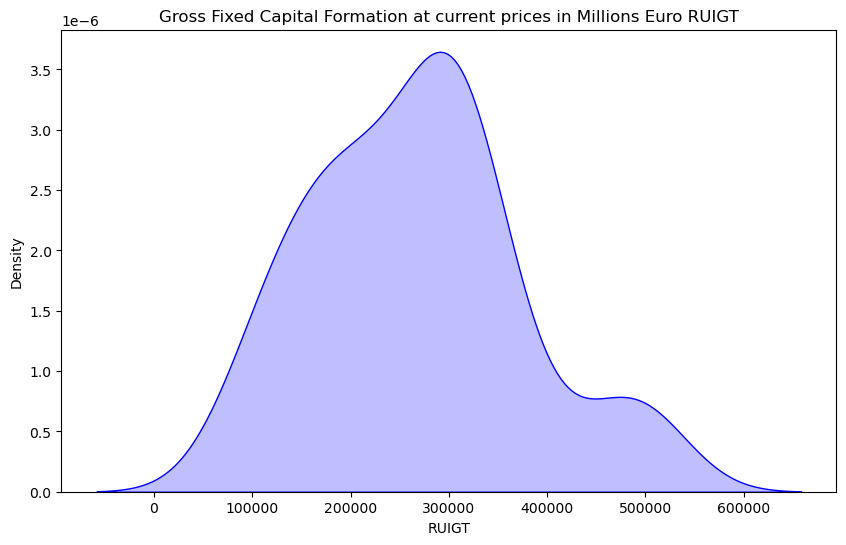

In [35]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plotting the Probability Density Function (PDF) of the 'RUIGT column with filling
sns.kdeplot(df['RUIGT'], fill=True, color="blue")

# Adding titles and labels for clarity
plt.title('Gross Fixed Capital Formation at current prices in Millions Euro RUIGT')
plt.xlabel('RUIGT')
plt.ylabel('Density')

# Show the plot
plt.show()

The curve has three peaks, I suggest there might be three different groups with simmilar treats. 

### Capital Stock at constant prices ROKND

Capital Stock at constant prices refers to the total value of all the physical assets (like machinery, buildings, equipment, etc.) that are used in the production of goods and services, adjusted for inflation to reflect the true value over time. This concept is important in economic analysis because it allows for the comparison of capital stock across different years without the distortion caused by changes in price levels.

When measuring capital stock over time, inflation can make it seem like the economy has more capital than it actually does. Capital stock at constant prices removes this effect, providing a more accurate picture of the actual changes in the amount of productive capital. Economists and policymakers use capital stock at constant prices to compare the growth or decline of capital stock in an economy over time, without the distortion caused by price changes. This helps to understand whether there’s an actual increase in the economy's productive capacity or if the apparent increase is just due to inflation. Companies and governments can use this data to understand how their investments in physical capital are evolving. For example, if the capital stock at constant prices is increasing, it may indicate that investment in new assets is outpacing inflation.

<center>Capital stock at the beginning of the period (K)<sup>t-1</sup> +</center> 
<center>Amount of capital formation during the period (GFCF)<sup>t</sup> -</center>
<center>Amount of capital consumption during the period (CFC)<sup>t</sup> =</center>  
<center>Capital stock at the end of the period (K)<sup>t</sup> </center>  



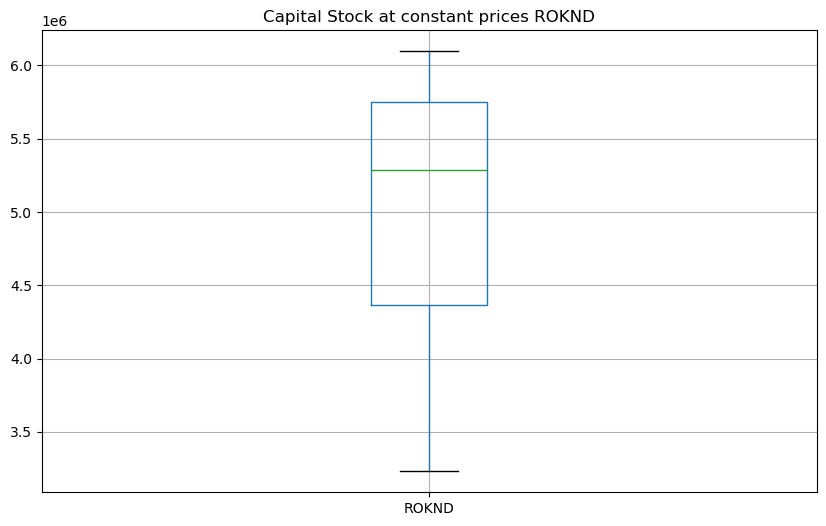

In [36]:
# Create a boxplot for the 'ROKND' column with customizations
df.boxplot(column='ROKND', figsize=(10, 6), grid=True)

plt.title('Capital Stock at constant prices ROKND')

# Display the plot
plt.show()

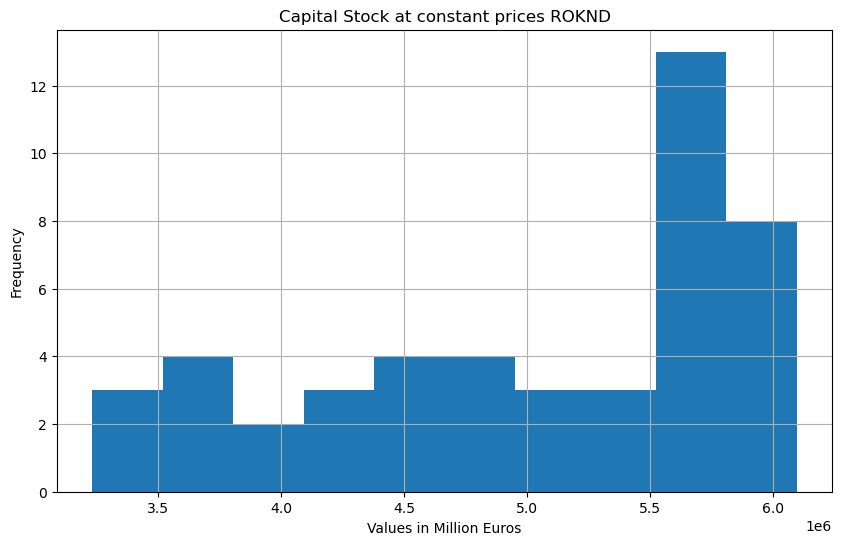

In [37]:
# Plot a histogram of 'ROKND'
df['ROKND'].hist(bins=10, figsize=(10, 6))

# Add title and labels
plt.title('Capital Stock at constant prices ROKND')
plt.xlabel('Values in Million Euros')
plt.ylabel('Frequency')

# Display the plot
plt.show()

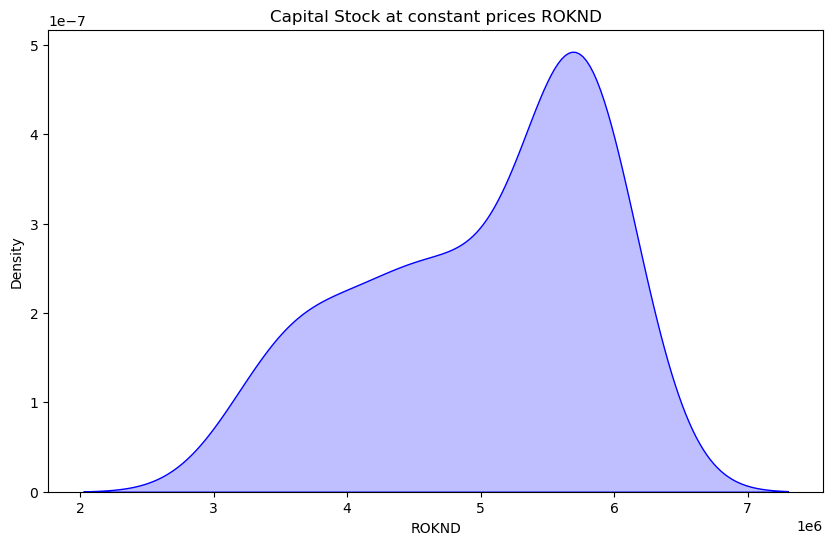

In [38]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plotting the Probability Density Function (PDF) of the 'RUIGT column with filling
sns.kdeplot(df['ROKND'], fill=True, color="blue")

# Adding titles and labels for clarity
plt.title('Capital Stock at constant prices ROKND')
plt.xlabel('ROKND')
plt.ylabel('Density')

# Show the plot
plt.show()

I would define this distribution as bi modal distribution

### Percentage of young people neither in employment nor in education and training (15-29 years) RPDNN

A NEET, which stands for "Not in Education, Employment, or Training", refers to an individual who is neither employed nor engaged in education or vocational training. The term originated in the United Kingdom in the late 1990s and has since been adopted in varying degrees by other countries, including Japan, South Korea, China, Serbia, Canada, and the United States. The NEET category encompasses both the unemployed (those actively seeking work) and individuals outside the labor force (those not seeking employment). Typically, the classification is age-restricted, excluding those who are in retirement.

The NEET indicator typically applies to individuals aged 15-29 and tracks youth unemployment and social exclusion. A high NEET rate may signal issues such as limited opportunities, poor economic conditions, or lack of access to education and training. Economically, high NEET rates are concerning because they can lead to long-term difficulties for young people entering the labor market and increase the risk of social marginalization.

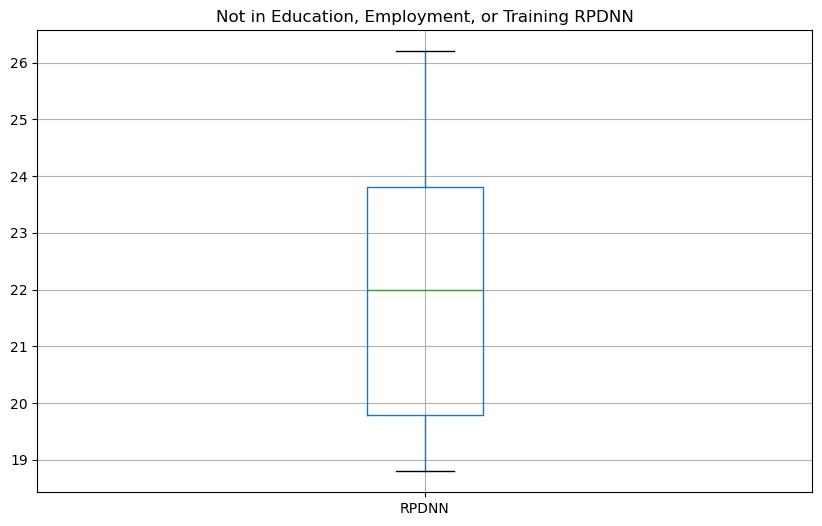

In [39]:
# Create a boxplot for the 'RPDNN' column with customizations
df.boxplot(column='RPDNN', figsize=(10, 6), grid=True)

plt.title('Not in Education, Employment, or Training RPDNN')

# Display the plot
plt.show()

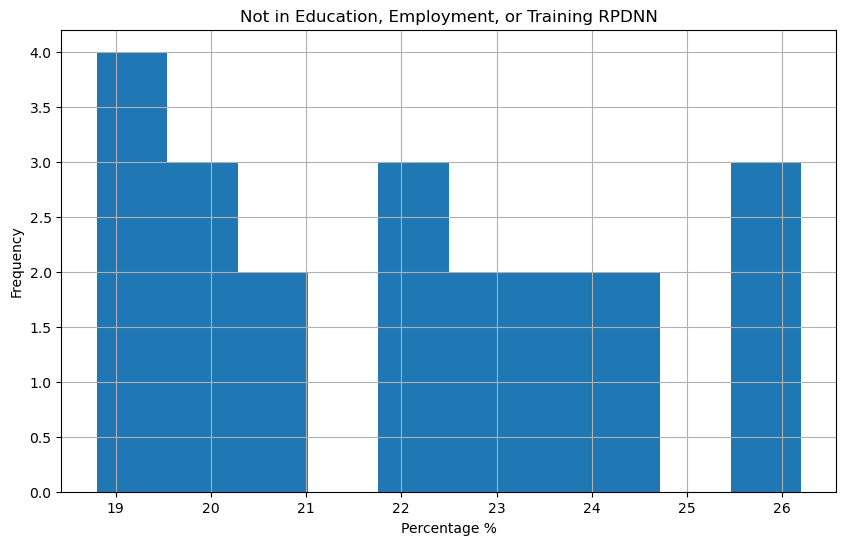

In [40]:
# Plot a histogram of 'RPDNN'
df['RPDNN'].hist(bins=10, figsize=(10, 6))

# Add title and labels
plt.title('Not in Education, Employment, or Training RPDNN')
plt.xlabel('Percentage %')
plt.ylabel('Frequency')

# Display the plot
plt.show()

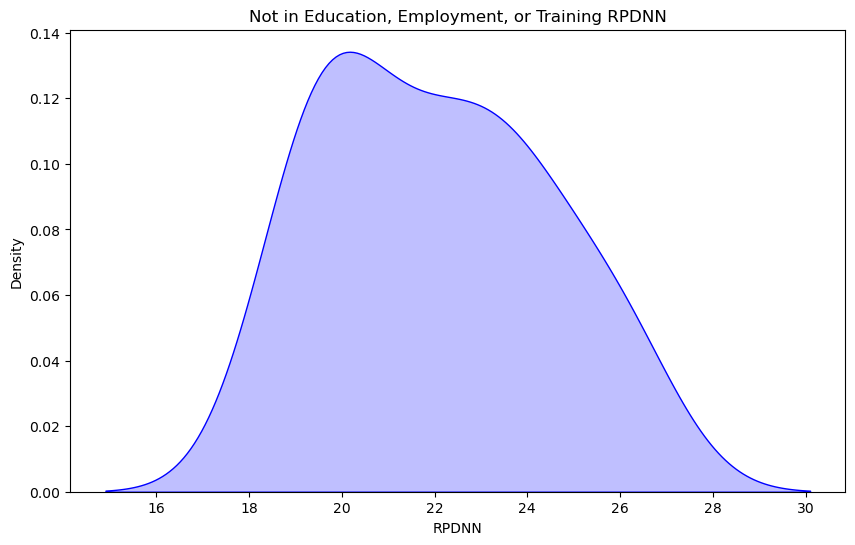

In [41]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plotting the Probability Density Function (PDF) of the 'RUIGT column with filling
sns.kdeplot(df['RPDNN'], fill=True, color="blue")

# Adding titles and labels for clarity
plt.title('Not in Education, Employment, or Training RPDNN')
plt.xlabel('RPDNN')
plt.ylabel('Density')

# Show the plot
plt.show()

Quite normal distribution